In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Getting the data imported into pandas

data = pd.read_csv("./data/loan_sanction_train.csv")

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# 614 examples each with 12 features and 1 label -> 13
data.shape

(614, 13)

In [4]:
# 68 percent recieved a loan approval
data.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


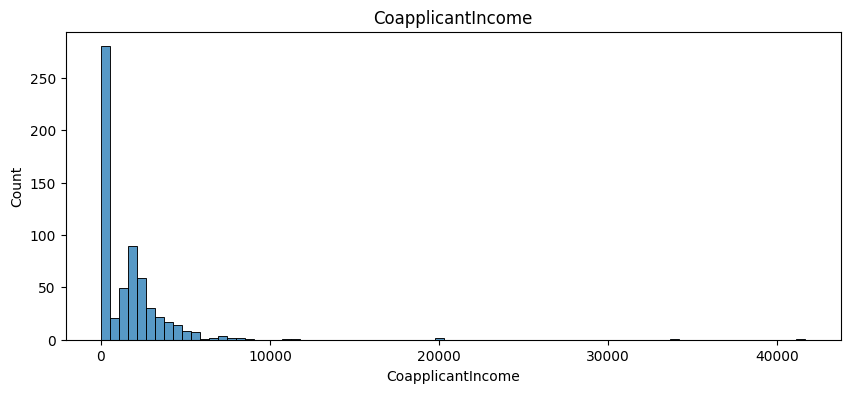

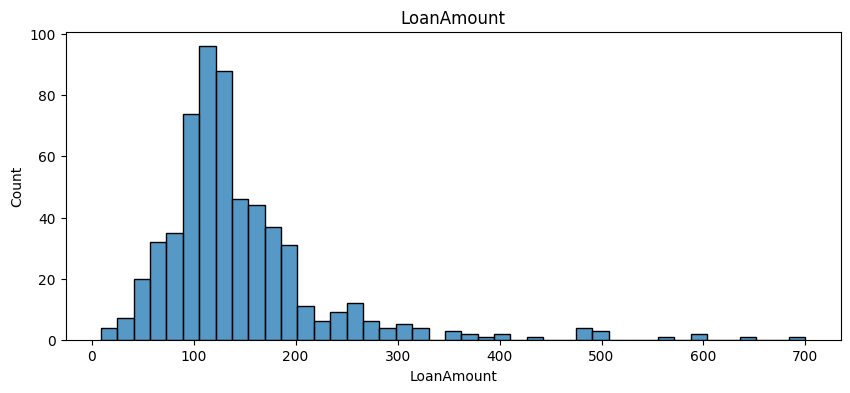

In [6]:
# Continious variable histogram shows that we have outliers on the 
# left, meaning that mean > median
for col in data.select_dtypes('float'):
    if col != "Credit_History" and col != "Loan_Amount_Term":
        plt.figure(figsize=[10, 4])
        plt.title(col)
        sns.histplot(x = data[col])

<AxesSubplot: title={'center': 'Applicant Income'}, xlabel='ApplicantIncome', ylabel='Count'>

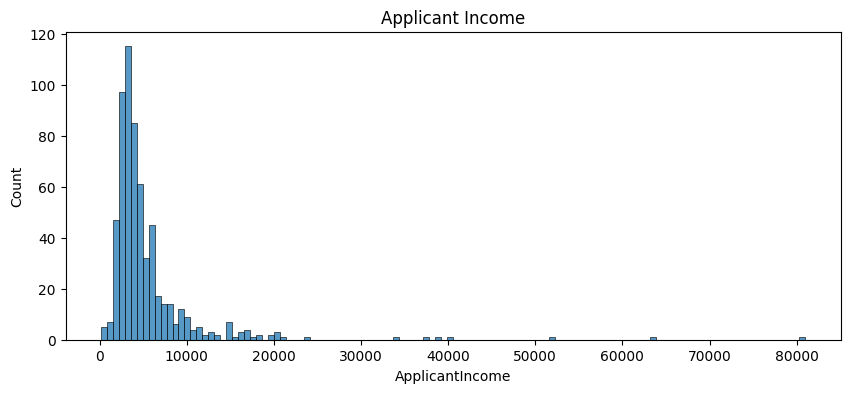

In [7]:
# There are some really rich people, making this have a mean > median
plt.figure(figsize=[10, 4])
plt.title("Applicant Income")
sns.histplot(x = data["ApplicantIncome"])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


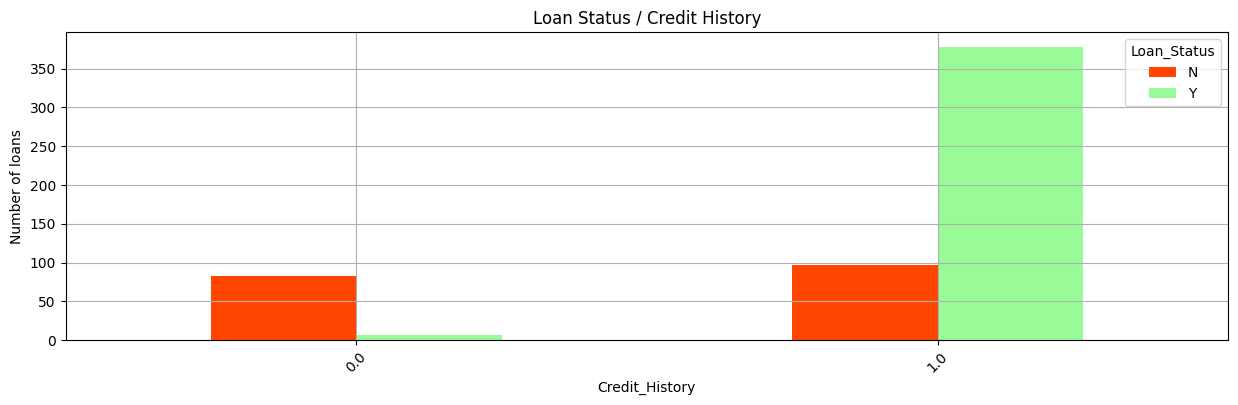

In [8]:
# People who have had credit history in the past have a greater chance
# of getting approved for a loan in the furture
pd.crosstab(data['Credit_History'], data['Loan_Status']).plot.bar(color = ['orangered', 'palegreen'], figsize = [15,4])
plt.xticks(rotation = 45)
plt.title('Loan Status / Credit History')
plt.grid()
plt.ylabel('Number of loans')

pd.crosstab(data['Credit_History'], data['Loan_Status'])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


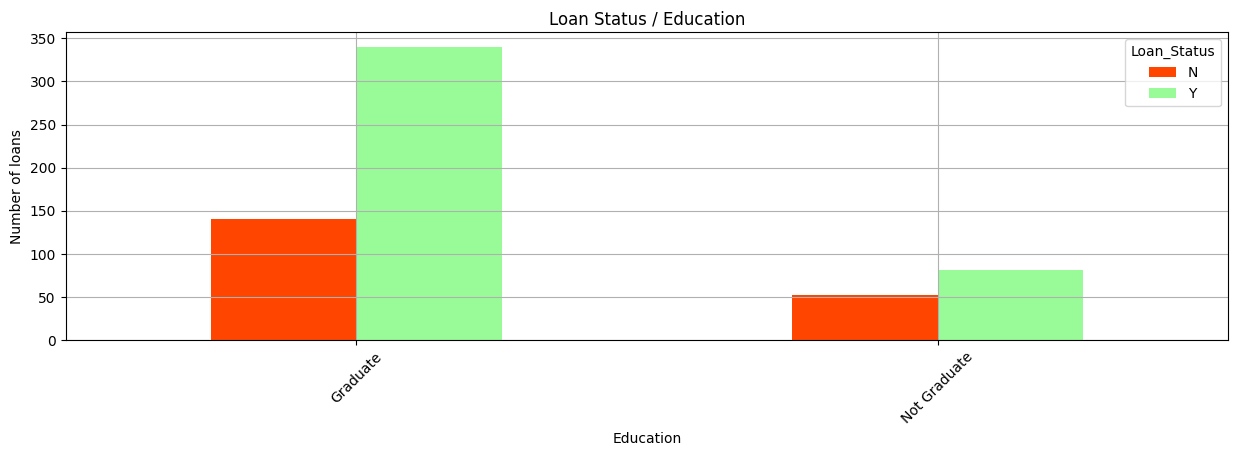

In [9]:
# People who have graduated in the past have a greater chance
# of getting approved for a loan in the furture
pd.crosstab(data['Education'], data['Loan_Status']).plot.bar(color = ['orangered', 'palegreen'], figsize = [15,4])
plt.xticks(rotation = 45)
plt.title('Loan Status / Education')
plt.grid()
plt.ylabel('Number of loans')

pd.crosstab(data['Education'], data['Loan_Status'])

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


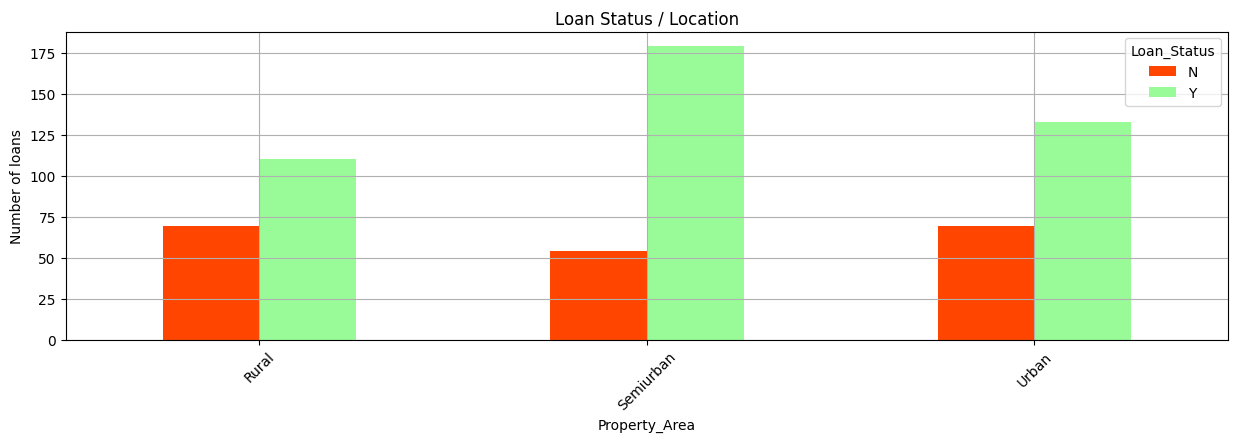

In [10]:
# People who have graduated in the past have a greater chance
# of getting approved for a loan in the furture
pd.crosstab(data['Property_Area'], data['Loan_Status']).plot.bar(color = ['orangered', 'palegreen'], figsize = [15,4])
plt.xticks(rotation = 45)
plt.title('Loan Status / Location')
plt.grid()
plt.ylabel('Number of loans')

pd.crosstab(data['Property_Area'], data['Loan_Status'])

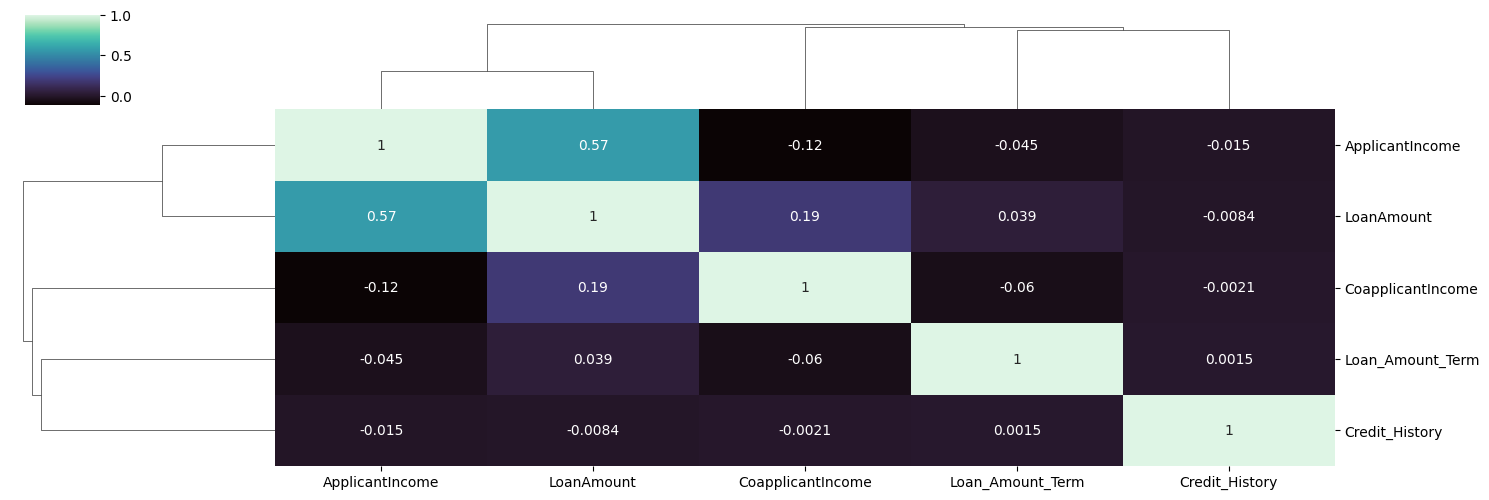

In [11]:
sns.clustermap(data.corr(), annot = True, figsize = [15,5], cmap="mako"); 

### Cleaning the Data ###

In [12]:
# Shows how many inputs are empty for each column
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Loan_Status,N,Y
Credit_History,,
0.0,95,44
1.0,97,378


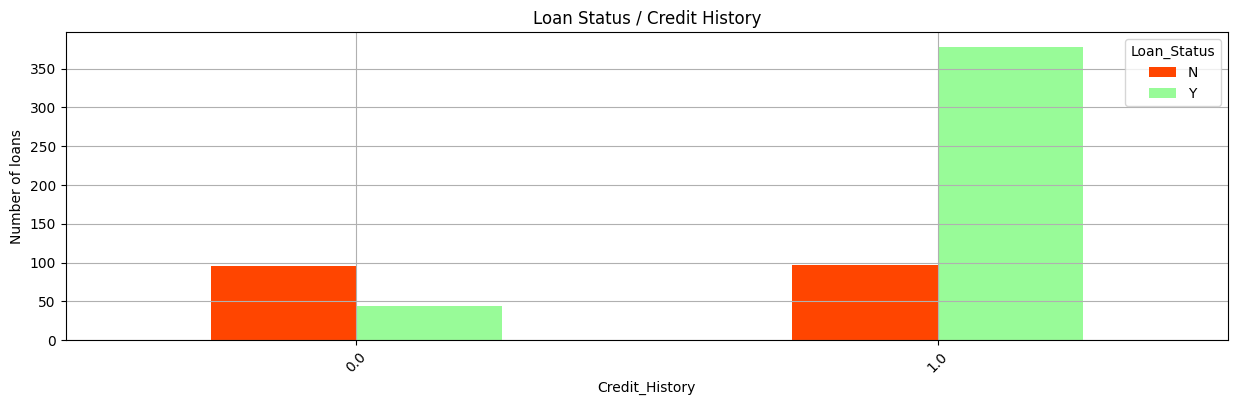

In [13]:
# If there is no credit history go ahead and assume that they have no credit history 
data["Credit_History"] = data["Credit_History"].fillna(0)

# Plot the with the updated data
pd.crosstab(data['Credit_History'], data['Loan_Status']).plot.bar(color = ['orangered', 'palegreen'], figsize = [15,4])
plt.xticks(rotation = 45)
plt.title('Loan Status / Credit History')
plt.grid()
plt.ylabel('Number of loans')

pd.crosstab(data['Credit_History'], data['Loan_Status'])

# We still get what we expected, however, we get an increases in yes's (about 30) for people that have assumed no credit history (we only increased here by 7)

In [14]:
# Remove rows where there are no loan amounts, it's pretty useless to determine whether or not we get the loan or not if we dont know hm they got approved for
data = data.dropna()

data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Syth. Data ###

In [15]:
def ratio(a, b):
  return b/a

data['WealthToLoanRatio'] = data.apply(lambda row : ratio(row['ApplicantIncome'], row['LoanAmount']), axis = 1)

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,WealthToLoanRatio
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.027929
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.022000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.046458
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.023500
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0.049289
